<a href="https://colab.research.google.com/github/TeAmP0is0N/Fake-News-Hindi/blob/master/Offensive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import copy
import re
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.options.display.max_colwidth = 0

In [ ]:
#Loading Embedding Features DataFrame

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_train.pkl"
f = open(path_temp,'rb')
mbert_train = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_test.pkl"
f = open(path_temp,'rb')
mbert_test = pickle.load(f)
f.close()


In [ ]:
mbert_train = mbert_train.rename(columns={'Defmatation':'Defamation'})
mbert_test = mbert_test.rename(columns={'Defmatation':'Defamation'})

In [ ]:
mbert_test = copy.deepcopy(mbert_train.iloc[5728:])
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
5728,0.146154,0.547867,0.063385,0.704434,0.324381,0.833834,-0.404689,0.602847,0.199473,0.629237,-0.006619,-0.769648,-0.609856,-0.194881,0.641315,-0.377627,-0.484244,-0.457588,-0.041876,-0.494019,-0.176284,0.133694,-0.437161,-0.569604,0.752515,0.278638,-0.179575,0.390398,0.661422,0.454654,-0.225835,-0.433343,-0.269566,-0.264891,0.322374,-0.032127,0.594944,0.576833,-0.206191,-0.276645,...,0.763836,-0.031216,0.360816,-0.740703,0.121272,0.164624,-0.469453,-0.289827,-0.197744,-0.000304,-0.157638,-0.005018,0.114211,1.116369,-0.436943,-0.135787,-0.049272,0.462445,-0.194197,-0.000036,0.470343,-0.504394,0.145645,-0.124713,0.549788,0.157939,-0.634953,0.087418,0.018456,0.132502,0.290918,0.026339,-0.303839,-0.383785,0,0,0,0,0,1
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5730,0.230976,0.036649,-0.075142,-0.065840,0.146906,0.516475,-0.021493,0.541686,0.101149,-0.120511,-0.467725,-0.444756,-0.281426,-0.098609,0.637130,-0.063365,-0.380275,-0.018878,-0.482018,-0.317568,0.111027,0.225833,-0.054039,-0.424595,0.194544,0.038557,-0.186881,-0.193370,0.591999,0.369952,0.042418,0.026700,-0.466828,-0.187227,0.012854,0.081637,0.241296,0.093436,0.186451,-0.261995,...,0.130383,-0.085573,0.352275,0.158224,-0.092934,-0.096448,-0.012385,-0.334627,0.009309,0.026509,-0.142873,0.142987,0.088554,0.329843,0.381739,-0.086784,-0.178658,-0.062562,-0.267836,0.273469,0.094416,-0.281027,-0.046625,-0.050893,-0.272043,-0.104741,-0.260660,0.087023,0.107649,0.211713,-0.146863,-0.051275,-0.338718,0.225769,0,0,0,0,0,1
5731,-0.067285,0.318646,0.287195,0.429583,0.955036,0.128375,-0.229407,0.483078,-0.309762,0.182423,-0.168166,-0.210630,-0.526781,0.007643,0.693394,0.116122,-0.313474,-0.052754,0.544722,-0.204525,-0.605577,-0.109177,-0.194510,-0.440187,0.190682,-0.341889,-0.295024,0.332466,0.527684,0.529618,-0.005527,0.162179,0.187716,-0.561326,-0.120739,-0.178538,0.113795,0.338779,-0.279709,0.255666,...,0.252021,-0.240705,-0.056583,-0.357401,0.554875,0.010119,0.447929,0.079127,-0.245895,0.590331,0.469499,-0.493029,0.243888,0.259959,0.448458,-0.280845,-0.152394,0.161396,-0.179084,0.181374,-0.058510,0.040826,-0.280462,-0.313203,-0.448469,-0.003820,-0.473894,-0.233364,0.345859,-0.492485,-0.475212,-0.166962,-0.428719,-0.124557,0,0,0,0,0,1
5732,-0.005713,0.370628,0.074260,0.224970,0.196585,0.557196,0.193560,0.302086,0.263122,0.114698,-0.727378,-0.409346,-0.259106,-0.030030,0.224294,0.091040,-0.221557,0.098222,-0.091383,-0.433689,0.165605,-0.140828,0.011527,-0.424334,0.337225,0.174716,0.145304,-0.033985,0.538006,0.105201,0.221713,-0.253962,-0.165644,-0.385971,-0.146430,-0.045834,0.085191,0.109826,0.248408,-0.380577,...,0.184876,-0.049601,0.328135,0.057756,-0.364830,0.260973,0.145899,-0.549393,0.010121,0.209491,-0.065839,-0.003389,0.371818,0.163327,-0.026481,0.117203,-0.531748,-0.239056,-0.177844,-0.107374,0.135009,-0.086531,-0.114612,-0.092102,0.291820,-0.284852,-0.297935,0.035257,0.155845,0.418267,-0.401720,-0.039830,0.097472,-0.251344,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_train = mbert_train[:5728]
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
1,-0.118905,0.228053,-0.107176,0.490232,0.064323,0.193036,-0.115965,0.182197,-0.033830,0.418321,-0.580961,-0.183495,-0.442750,-0.137044,0.832290,-0.011683,-0.100912,-0.162872,-0.248151,-0.105499,-0.078988,-0.184226,-0.190933,-0.587855,0.042618,-0.039224,-0.304879,-0.287771,0.666709,0.312562,0.186880,-0.143464,-0.849030,-0.094588,0.329206,-0.296587,0.136138,0.068638,0.148622,-0.297672,...,0.145548,-0.158586,-0.151615,0.398459,-0.599488,0.199375,-0.031982,-0.467552,-0.098465,-0.052053,-0.002969,-0.518265,-0.011382,0.019811,-0.344297,-0.044616,-0.226941,-0.270408,-0.133766,-0.231164,0.347956,-0.600360,-0.373046,0.087023,-0.074193,-0.570094,-0.411533,0.641706,-0.230593,0.029968,-0.275100,0.135672,-0.620829,-0.085859,0,0,0,0,0,1
2,-0.352412,0.891742,0.370846,0.738691,0.244717,-0.261234,-0.304924,0.394029,0.102821,0.460116,-0.736791,-0.375218,-0.648683,-0.159392,0.425843,-0.108971,-0.279309,-0.227840,0.113636,0.227143,0.124894,0.008834,-0.111008,-0.102820,0.491229,-0.361893,0.189791,0.176033,-0.018359,0.215636,0.016045,-0.338596,-0.092527,-0.432481,-0.098161,-0.020594,-0.055031,-0.048911,-0.039941,-0.622446,...,0.142103,-0.157460,0.423662,-0.005628,-0.131595,0.013594,-0.172776,-0.170781,-0.006833,0.215784,-0.004821,0.238154,0.322642,0.324871,-0.444282,0.642850,-0.339420,-0.227259,-0.107162,-0.267277,0.244657,-0.711058,-0.077447,-0.174185,0.037721,-0.190050,-0.100604,-0.016387,0.237433,-0.327698,0.425320,-0.159900,0.017658,-0.654000,0,0,0,0,0,1
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
4,-0.186740,0.340729,0.133961,0.389023,0.148840,0.123022,0.013151,0.485828,0.156027,0.398113,-0.373687,-0.427570,-0.384739,-0.246714,0.908449,-0.219268,-0.199005,-0.184001,-0.288396,0.089997,0.118162,-0.133072,0.141761,-0.236784,0.477970,0.102205,-0.181945,-0.035385,0.650147,0.087995,0.055624,0.039921,-0.569286,-0.294644,0.009235,-0.301235,-0.122495,0.327218,0.257748,-0.556150,...,0.384445,-0.160819,-0.013044,0.228933,-0.493046,0.064510,-0.408671,-0.749835,-0.096949,0.133533,-0.134637,-0.149993,0.209405,-0.397121,-0.087614,0.210257,-0.381701,-0.422058,-0.116346,-0.185475,0.108368,-0.466941,-0.062735,-0.037566,-0.198277,-0.147195,-0.600615,0.355162,0.012961,0.369998,-0.535832,0.037708,-0.461856,-0.222959,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_train = mbert_train[mbert_train.Hostile != 0]
mbert_test  = mbert_test[mbert_test.Hostile != 0]

In [ ]:
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
5,-0.499581,0.077111,0.518150,0.277016,0.804859,0.737483,0.722120,0.158270,0.872074,-0.053315,-0.604814,0.561239,0.218449,-0.010979,-0.113409,-0.258660,0.873823,0.087324,-0.251644,-0.696970,0.297934,-0.213283,0.535202,0.275622,0.369480,-0.125013,0.376849,0.122524,1.201686,0.446440,0.201188,-0.637028,-0.092952,0.522705,0.162834,0.262670,0.479493,0.326554,0.663066,0.154459,...,0.297675,0.417926,0.023016,-0.168096,0.308027,0.528007,-0.009571,-0.406615,-0.461680,0.221650,0.492613,0.013956,-0.195613,0.510019,-0.283027,-0.020554,-0.494089,0.317672,0.122161,-0.171801,-0.324345,-0.613952,0.343257,-0.465667,0.319353,-0.488010,-0.114244,0.025330,1.018319,-0.307379,-0.756182,0.144956,-0.279479,-0.428655,1,0,1,0,0,0
10,-0.206654,-0.154767,-0.077805,0.185743,0.390758,0.157171,0.136405,0.105980,-0.207364,0.253556,-0.519931,-0.396713,0.003078,0.234914,0.491026,0.014966,0.019506,0.287167,-0.070878,0.032925,0.005649,0.104098,-0.135924,-0.376320,0.262487,-0.196782,-0.220010,0.361522,0.350484,-0.115047,-0.158203,-0.172915,-0.011325,-0.128907,0.489465,-0.410534,0.185644,0.039661,0.234515,0.169910,...,0.023170,-0.564426,-0.050905,-0.486430,0.274327,0.137450,0.045957,-0.507151,0.076695,0.042364,0.090182,-0.231705,0.192196,0.455936,0.060587,0.238302,0.287338,-0.452074,0.038033,0.830444,0.418025,0.011348,0.041884,-0.068801,0.548521,0.334340,-0.413074,-0.104423,0.364389,-1.347244,-0.663354,-0.210312,0.354122,-0.672869,1,0,0,1,0,0
11,0.018682,-0.073562,0.238370,0.155516,0.142388,0.123459,-0.065132,-0.448243,0.250480,-0.432819,-0.381213,0.533267,-0.550119,0.237228,0.423437,-0.157230,-0.030969,-0.052284,0.202883,0.406507,0.123520,-0.035303,-0.172672,-0.335408,-0.170309,-0.485095,0.126161,0.373675,0.152290,-0.259221,-0.219538,0.027428,-0.155110,-0.185012,0.318398,-0.065398,0.217137,-0.114119,-0.294747,-0.147974,...,0.345800,0.301141,-0.406305,-0.338731,0.419367,-0.121415,-0.018051,0.088275,0.012285,-0.073712,-0.117884,-0.010205,0.444579,0.353796,0.203827,0.518262,-0.186595,-0.492082,-0.212702,-0.027438,0.501132,0.313623,-0.110661,-0.002985,0.492367,-0.102734,-0.203346,-0.217320,-0.116087,-0.064305,-0.274341,0.366008,0.171559,0.217962,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5735,-0.004363,0.816025,0.505399,0.437898,0.051917,0.831797,0.227627,0.323265,-0.489145,0.265492,-0.285402,0.211053,-0.726506,0.290096,0.254221,-0.270611,-0.462907,-0.079644,-0.203419,0.047276,-0.391237,-0.304857,0.239075,-0.589894,0.599874,-0.232406,-0.128858,0.786982,1.114148,0.218448,0.486943,-0.120259,-0.380505,-0.509112,-0.152036,-0.422068,0.510905,0.426297,0.230117,-0.550102,...,-0.094420,0.427043,0.857831,-0.430588,-0.336866,-0.184725,0.080523,-0.724982,-0.038222,0.055051,-0.126235,0.133531,0.004573,-0.107548,0.113174,0.257563,-0.481987,-0.545148,0.222347,-0.334471,-0.202869,-0.641820,0.113018,-0.045737,0.273122,0.254466,-0.251761,-0.057999,-0.286616,-0.077077,-0.872802,0.131142,-0.931395,-0.541869,1,0,1,0,0,0
5740,0.197693,0.508914,0.101199,0.368006,0.613338,0.250943,-0.056955,0.204821,-0.228964,0.401867,-0.882125,-0.293489,-0.139242,-0.635509,0.690742,-0.202784,0.094957,-0.214538,-0.055696,0.009705,0.244651,0.172975,0.081270,-0.318802,-0.129489,-0.467040,-0.107654,0.167139,0.303702,0.000861,-0.001427,-0.079253,-0.275102,-0.636850,0.330742,-0.603061,0.058616,0.424818,-0.108958,-0.142682,...,0.736229,-0.053996,-0.244462,-0.220606,-0.052814,-0.192940,0.062791,-0.301433,-0.388563,0.172640,0.254238,-0.409373,0.502687,0.990147,0.178437,0.466927,0.364300,0.094386,-0.059769,-0.160144,-0.137884,-0.219620,0.480176,0.080559,0.318720,-0.176824,-0.779362,-0.112083,0.036163,0.319494,-0.055775,0.173819,-0.315028,-0.339154,1,0,0,0,1,0
5741,0.013190,0.362132,0.252457,0.289119,0.357710,0.503224,-0.112755,0.682085,-0.155287,0.011575,-0.448585,-0.001631,-0.355434,-0.043127,0.670572,0.411262,-0.421775,-0.058489,-0.198088,0.068159,0.040861,0.119418,0.265696,-0.187515,0.097031,-0.480831,0.296237,0.326486,0.730855,-0.018066,0.029688,-0.311535,-0.285570,-0.477477,0.285050,-0.227490,0.009030,0.151133,0.124378,-0.305238,...,0.305466,0.193619,0.041991,0.251624,-0.326550,-0.010747,0.150767,-0.325618,-0.068830,-0.219014,-0.405286,-0.216468,0.327619,0.052102,0.012487,-0.102818,0.040464,-0.147571,-0.175714,-0.175883,0.151458,-0.157537,0.109227,-0.003063,-0.133370,-0.099427,-0.430127,-0.034707,-0.028875,-0.122717,-0.225889,-0.240641,-0.200220,-0.035929,1,0,1,0,0,0
5743,-0.498224,-0.431304,0.428351,0.586207,0.153831,0.028412,0.577736,0.410518,0.470547,0.167039,0.464519,0.543658,-0.018296,-0.034797,-0.437079,-0.461500,0.469034,-1.050248,-0.441438,-0.434329,-0.770376,0.167111,-0.016369,0.539758,-0.435720,0.523325,0.429732,0.734454,0.440326,0.417136,0.072839,-0.500774,0.941360,0.026220,0.683758,-0.461225,0.136628,0.498431,-0.161267,-0.713359,...,-0.189130,0.207238,0.689125,0.874556,0.466780,-0.082485,-0.201841,-0.415030,-0.454882,-1.090546,-0.015185,-0.458431,0.345103,1.158651,0.148362,-0.841259,-0.912859,0.503202,0.039510,-0.104101,0.403029,0.640189,0.792183,-0.638705,0.447917,-0.328648,-0.637586,-0.314891,-0.028041,-0.359848,-0.221908,-0.343421,-0.088877,-0.950372,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
print(sum(mbert_train['Hostile']))
print(sum(mbert_test['Hostile']))

print(sum(mbert_train['Offensive']))
print(sum(mbert_test['Offensive']))

2678
376
742
103


In [ ]:
mbert_train = np.asarray(mbert_train)
mbert_test  = np.asarray(mbert_test)

#Fine Grained Models

In [ ]:
## -5 for Defamation
## -4 For Fake
## -3 For Hate
## -2 For Offensive

##offensive Models

In [ ]:
offensive_x_train = mbert_train[:,:-6]
offensive_y_train = mbert_train[:,-2]

offensive_x_test = mbert_test[:,:-6]
offensive_y_test = mbert_test[:,-2]

print("offensive_x_train: ",offensive_x_train.shape)
print("offensive_y_train",offensive_y_train.shape)
print("offensive_x_test",offensive_x_test.shape)
print("offensive_y_test",offensive_y_test.shape)

offensive_x_train:  (2678, 768)
offensive_y_train (2678,)
offensive_x_test (376, 768)
offensive_y_test (376,)


## SVM for offensive Prediction

In [ ]:
print(np.sum(offensive_y_train))
print(np.sum(offensive_y_test))

742.0
103.0


In [ ]:
# param_grid = {'C': [0.01, 0.1, 1, 10],
#               'gamma': [1,0.1],
#               'kernel': ['rbf','linear']}


# grid = GridSearchCV(SVC(),param_grid,verbose=10)
# grid.fit(x_train,y_train)
# print(grid.best_params_)

In [ ]:
offensive_clf = SVC(kernel='linear',C=0.01,gamma=1,class_weight='balanced',verbose=True) ### Earlier C=1, gamma=0.01 gave 76% accuracy
offensive_clf.fit(offensive_x_train,offensive_y_train)

[LibSVM]

SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [ ]:
#Dumping the SVM Model
# joblib.dump(offensive_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/svm_offensive_clf.pkl")
offensive_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/svm_offensive_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = offensive_clf.predict(offensive_x_test)
print(classification_report(offensive_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=offensive_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69       273
         1.0       0.35      0.53      0.42       103

    accuracy                           0.60       376
   macro avg       0.56      0.58      0.55       376
weighted avg       0.66      0.60      0.62       376

(array([0., 1.]), array([217, 159]))
[0.68979592 0.41984733]


Text(0.5, 62.15999999999998, 'Predicted label')

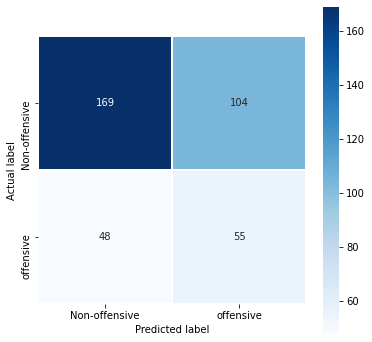

In [ ]:
cm = metrics.confusion_matrix(offensive_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]


a = f1_score(y_true, y_pred, average='weighted')
print(a)

print(classification_report(y_true,y_pred))

0.26666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6



##Random Forest Classifier

In [ ]:
#Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
offensive_clf = RandomForestClassifier(n_estimators=400).fit(offensive_x_train, offensive_y_train)

In [ ]:
#Dumping the SVM Model
# joblib.dump(offensive_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/rf_offensive_clf.pkl")
offensive_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/rf_offensive_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = offensive_clf.predict(offensive_x_test)
print(classification_report(offensive_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=offensive_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83       273
         1.0       0.36      0.04      0.07       103

    accuracy                           0.72       376
   macro avg       0.55      0.51      0.45       376
weighted avg       0.63      0.72      0.62       376

(array([0., 1.]), array([365,  11]))
[0.8338558  0.07017544]


Text(0.5, 62.15999999999998, 'Predicted label')

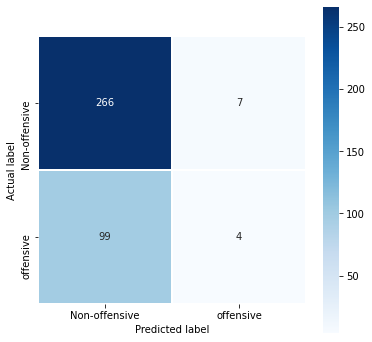

In [ ]:
cm = metrics.confusion_matrix(offensive_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

### 768 --> 30 --> 10 --> 2

offensive_clf= MLPClassifier(hidden_layer_sizes = (30,10),activation='relu',max_iter=10000,learning_rate_init=0.001)
offensive_clf.fit(offensive_x_train,offensive_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# learning_rates = [0.001, 0.005, 0.05, 0.1, 0.5, 1, 2, 5, 10]

# for lr in learning_rates:
#     offensive_clf= MLPClassifier(hidden_layer_sizes = (30,10),activation='relu',max_iter=10000)
#     offensive_clf.fit(offensive_x_train,offensive_y_train)
    
#     print("Training set score: %f" % offensive_clf.score(offensive_x_train, offensive_y_train))
#     print("Test set score: %f" % offensive_clf.score(offensive_x_test, offensive_y_test))

In [ ]:
#Dumping the SVM Model
# joblib.dump(offensive_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/mlp_offensive_clf.pkl")
offensive_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/mlp_offensive_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = offensive_clf.predict(offensive_x_test)
print(classification_report(offensive_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=offensive_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74       273
         1.0       0.37      0.46      0.41       103

    accuracy                           0.64       376
   macro avg       0.57      0.58      0.57       376
weighted avg       0.66      0.64      0.65       376

(array([0., 1.]), array([248, 128]))
[0.73704415 0.40692641]


Text(0.5, 62.15999999999998, 'Predicted label')

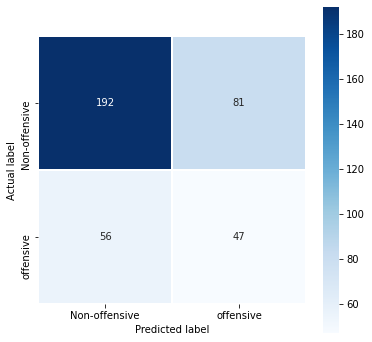

In [ ]:
cm = metrics.confusion_matrix(offensive_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
offensive_clf = 0
offensive_clf = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000,class_weight='balanced').fit(offensive_x_train, offensive_y_train)

In [ ]:
#Dumping the SVM Model
# joblib.dump(offensive_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/lr_offensive_clf.pkl")
offensive_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/lr_offensive_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = offensive_clf.predict(offensive_x_test)
print(classification_report(offensive_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=offensive_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       273
         1.0       0.35      0.43      0.39       103

    accuracy                           0.63       376
   macro avg       0.56      0.57      0.56       376
weighted avg       0.65      0.63      0.64       376

(array([0., 1.]), array([252, 124]))
[0.7352381 0.3876652]


Text(0.5, 62.15999999999998, 'Predicted label')

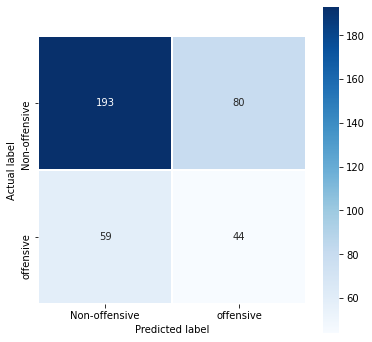

In [ ]:
cm = metrics.confusion_matrix(offensive_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-offensive', 'offensive']
yticklabels = ['Non-offensive', 'offensive']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')